In [25]:
import os
from openseespy.opensees import *
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [26]:
print(os.getcwd())

c:\Users\HEC\Downloads\OPENSEESPY


In [43]:
# os.chdir('.\\OPENSEESPY')
currentDir = os.getcwd()
dir = currentDir + "\\MVLEM_SWallipTHA3"
print(dir)

if not os.path.exists(dir):
    os.makedirs(dir)
    print("해당경로가 없으므로 폴더를 생성합니다.")
else:
    print("해당경로가 이미 존재합니다. 경로에 파일을 저장합니다.")

c:\Users\HEC\Downloads\OPENSEESPY\MVLEM_SWallipTHA3
해당경로가 이미 존재합니다. 경로에 파일을 저장합니다.


In [28]:
wipe ()

In [29]:
model ('basic', '-ndm', 2, '-ndf', 3)

m1 = 13.56
m2 = 27.12
m3 = 27.12
m4 = 27.12
m5 = 118.64
g = 9806.0
weight = 224*g
numModes = 3

fc = -27.6
fy = 413.685
Es = 200000
Ec = 4700*(-fc)**0.5
nu = 0.17
G = Ec/(2*(1+nu))
D = 16

As = D**2/4*3.141592
H = 3660
massDens = m1/H

In [30]:
node (1, 0.0, 0.0, 0.0, '-mass', m1, m1, m1 )
node (2, 0.0, H/4, 0.0, '-mass', m2, m2, m2)
node (3, 0.0, H*2/4, 0.0, '-mass', m3, m3, m3)
node (4, 0.0, H*3/4, 0.0, '-mass', m4, m4, m4)
node (5, 0.0, H*4/4, 0.0, '-mass', m5, m5, m5)

fix (1, 1, 1, 1)

IDctrlNode = 5
IDctrlDOF = 1

rouYb = 0.00748
rouYw = 0.01039
tb = 1270
tw = 127
bb = 254
bw = 1524

In [31]:
uniaxialMaterial ('Steel02', 3, fy, Es, 0.03, 18, 0.925, 0.15)
uniaxialMaterial ('Concrete02', 4, fc, -0.003, 0.2*fc, -0.005, 0.01, -0.1*fc, -0.1*fc/0.002)
Ashweb = 780*25.4*tw
GAs = G*Ashweb

uniaxialMaterial ('Elastic', 5, GAs)

In [32]:
element ('MVLEM', 1, 0.0, 1, 2, 15, 0.4, '-thick', tb, tw, tw, tw, tw, tw, tw, tw, tw, tw, tw, tw, tw, tw, tb, '-width', bb, bw, bw, bw, bw, bw, bw, bw, bw, bw, bw, bw, bw, bw, bb, '-rho', rouYb, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYb, '-matConcrete', 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, '-matSteel', 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, '-matShear', 5)
element ('MVLEM', 2, 0.0, 2, 3, 15, 0.4, '-thick', tb, tw, tw, tw, tw, tw, tw, tw, tw, tw, tw, tw, tw, tw, tb, '-width', bb, bw, bw, bw, bw, bw, bw, bw, bw, bw, bw, bw, bw, bw, bb, '-rho', rouYb, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYb, '-matConcrete', 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, '-matSteel', 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, '-matShear', 5)
element ('MVLEM', 3, 0.0, 3, 4, 15, 0.4, '-thick', tb, tw, tw, tw, tw, tw, tw, tw, tw, tw, tw, tw, tw, tw, tb, '-width', bb, bw, bw, bw, bw, bw, bw, bw, bw, bw, bw, bw, bw, bw, bb, '-rho', rouYb, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYb, '-matConcrete', 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, '-matSteel', 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, '-matShear', 5)
element ('MVLEM', 4, 0.0, 4, 5, 15, 0.4, '-thick', tb, tw, tw, tw, tw, tw, tw, tw, tw, tw, tw, tw, tw, tw, tb, '-width', bb, bw, bw, bw, bw, bw, bw, bw, bw, bw, bw, bw, bw, bw, bb, '-rho', rouYb, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYw, rouYb, '-matConcrete', 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, '-matSteel', 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, '-matShear', 5)

In [33]:
initialize

recorder('Node', '-file', 'MVLEM_SWallipTHA3/MVLEM_DispTop.out','-time', '-node', IDctrlNode, '-dof', 1, 2, 3, 'disp')
recorder('Node', '-file', 'MVLEM_SWallipTHA3/MVLEM_ReacBot.out', '-time', '-node', 1, '-dof', 1, 2, 3, 'reaction')
recorder('Element', '-file', 'MVLEM_SWallipTHA3/MVLEM_Shear_Disp.out', '-time', '-ele', 1, 'shear_force_deformation')

timeSeries ('Linear', 1)
pattern ('Plain', 1, 1 )
load (IDctrlNode, 0, -weight, 0)

In [34]:
Tol=1.0e-8
NstepGravity=10
DGravity=1/NstepGravity

integrator ('LoadControl', DGravity)
numberer('Plain')
system('BandGeneral')
constraints('Plain')
test('NormDispIncr', Tol, 6)
algorithm('Newton')
analysis('Static')
analyze(NstepGravity)
loadConst('-time', 0.0)

In [35]:
eigenValues = eigen(numModes)
pi = 3.141592
T = []
from math import sqrt
for i in range (0, numModes):
    lamb = eigenValues [i]
    period = 2*pi/sqrt(lamb)
    T.append (period)
print (T)

[0.018166528179594105, 0.005665484713896661, 0.004753727603253387]


In [36]:
time = [0.0, 0.034, 0.050]
values = [2474600.0, 398500.0, 0.0]

timeSeries ('Path', 2, '-values', *values, '-time', *time)
pattern ('Plain', 2, 2)
load (IDctrlNode, 1.0, 0.0, 0.0)

In [37]:
wipeAnalysis()
constraints ('Plain')
numberer ('Plain')
system ('BandGeneral')
test ('NormDispIncr', 0.01,1200)
algorithm ('Newton')

In [38]:
NewmarkGamma = 0.5
NewmarkBeta = 0.25

integrator ('Newmark', NewmarkGamma, NewmarkBeta)
analysis ('VariableTransient')
analyze (75, 0.002)

0

In [39]:
dfManual = pd.read_csv('./Manual Calculation/SWallIPManual.csv', sep='	', header = None)
df1 = pd.read_csv('MVLEM_SWallIPTHA3/MVLEM_DispTop.out', sep=' ', header = None)
df2 = pd.read_csv('MVLEM_SWallIPTHA3/MVLEM_ReacBot.out', sep=' ', header = None)
df3 = pd.read_csv('MVLEM_SWallIPTHA3/MVLEM_Shear_Disp.out', sep=' ', header = None)

df4 = df1[1]-df3[1]*3660
df5 = df2[0]
df6 = df2[1]/(-1000)

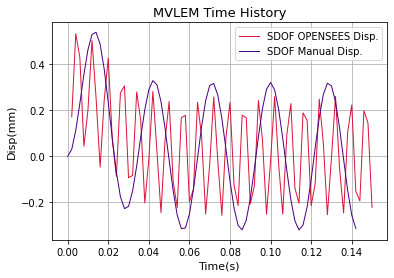

In [40]:
a=10
plt.plot(df5[a:], df4[a:], label = "SDOF OPENSEES Disp.", color='crimson', linewidth = 1.0)
plt.plot(dfManual[0], dfManual[1], label = "SDOF Manual Disp.", color='indigo', linewidth = 1.0)
plt.legend()
plt.title('MVLEM Time History', size = 13)
plt.xlabel('Time(s)', size = 11)
plt.ylabel('Disp(mm)', size = 11)
plt.grid(True)
plt.show()

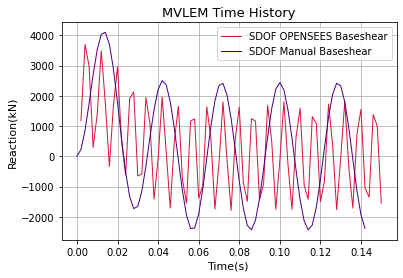

In [41]:
plt.plot(df5[a:], df6[a:], label = "SDOF OPENSEES Baseshear", color='crimson', linewidth = 1.0)
plt.plot(dfManual[0], dfManual[2], label = "SDOF Manual Baseshear", color='indigo', linewidth = 1.0)
plt.legend()
plt.title('MVLEM Time History', size = 13)
plt.xlabel('Time(s)', size = 11)
plt.ylabel('Reaction(kN)', size = 11)
plt.grid(True)
plt.show()

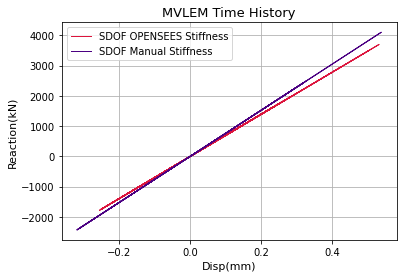

In [42]:
plt.plot(df4[a:], df6[a:], label = "SDOF OPENSEES Stiffness", color='crimson', linewidth = 1.0)
plt.plot(dfManual[1], dfManual[2], label = "SDOF Manual Stiffness", color='indigo', linewidth = 1.0)
plt.legend()
plt.title('MVLEM Time History', size = 13)
plt.xlabel('Disp(mm)', size = 11)
plt.ylabel('Reaction(kN)', size = 11)
plt.grid(True)
plt.show()